## Model Building Phase
We have done with the collection of used car data in data collection file, here we are going to build a machine learning model.Before making the pandas data frame we will have to load the data which we had saved through joblib lib.

In [124]:
import joblib

In [125]:
Car_name=joblib.load("Car_name.pkl")
Fuel_type=joblib.load("Fuel_type.pkl")
History=joblib.load("History.pkl")
Kilometers_Driven=joblib.load("Kilometers_Driven.pkl")
Owner=joblib.load("Owner.pkl")
Transmission=joblib.load("Transmission.pkl")
Year_of_purches=joblib.load("Year_of_purches.pkl")
Price=joblib.load("Price.pkl")

### Importing the lib.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy

In [127]:
data=pd.DataFrame({"car name":Car_name,'year of purches':Year_of_purches,'Kilometers_Driven':Kilometers_Driven,
                  'Owner':Owner,'Fuel_type':Fuel_type,'Transmission':Transmission,'Price':Price})

In [128]:
data.head()

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,Price
0,2014 Mercedes Benz C Class C 200 AVANTGARDE AU...,January 2014,"36,806 km",1st Owner,Petrol,AUTOMATIC,"₹ 21,33,299"
1,2009 Maruti Wagon R LXI MINOR MANUAL,October 2009,"57,473 km",1st Owner,Petrol,MANUAL,"₹ 1,56,599"
2,2020 KIA SELTOS GTX + AT PETROL AUTOMATIC,September 2020,"7,568 km",1st Owner,Petrol,AUTOMATIC,"₹ 17,41,799"
3,2019 Honda Amaze 1.2 EMT I VTEC MANUAL,June 2019,"15,973 km",1st Owner,Petrol,MANUAL,"₹ 5,72,399"
4,2021 Renault Kiger RXZ 1.0 Easy R Petrol,February 2021,"2,747 km",1st Owner,Petrol,NA,"₹ 8,56,699"


In [129]:
data.shape

(5104, 7)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   car name           5104 non-null   object
 1   year of purches    5104 non-null   object
 2   Kilometers_Driven  5104 non-null   object
 3   Owner              5104 non-null   object
 4   Fuel_type          5104 non-null   object
 5   Transmission       5104 non-null   object
 6   Price              5104 non-null   object
dtypes: object(7)
memory usage: 279.2+ KB


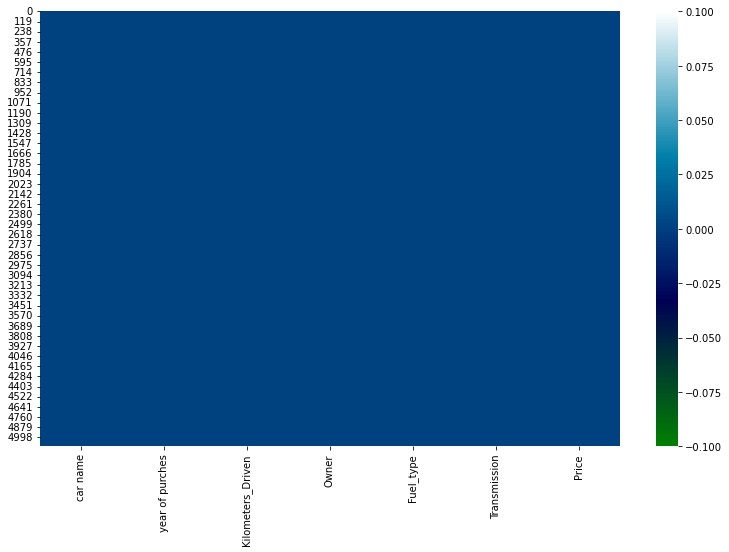

In [131]:
plt.figure(figsize=[13,8])
sns.heatmap(data.isnull(),cmap='ocean')
plt.show()

### Observation-1
In the above dataset :

1) The size of table is 5104*7 i.e. no. of rows are 5100 and no. of columns are 7(including target).

2) Out of 7 columns 2 columns are continuous in nature and rest 5 are object type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap, so there is no need to adopt imputation techniuqe.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

### Data cleaning

In [132]:
backup=data.copy()

In [133]:
data['car name']=data['car name'].str.split(" ").str.slice(1,4).str.join(" ")

In [134]:
data['company']=data['car name'].str.split(" ").str.slice(0,1).str.join(" ")

In [135]:
data["year of purches"]=data['year of purches'].str.split(" ").str.slice(1).str.join(" ")

In [136]:
data=data[data['year of purches']!=""]

In [137]:
data['year of purches']=data['year of purches'].astype(int)

In [138]:
data.head()

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,Price,company
0,Mercedes Benz C,2014,"36,806 km",1st Owner,Petrol,AUTOMATIC,"₹ 21,33,299",Mercedes
1,Maruti Wagon R,2009,"57,473 km",1st Owner,Petrol,MANUAL,"₹ 1,56,599",Maruti
2,KIA SELTOS GTX,2020,"7,568 km",1st Owner,Petrol,AUTOMATIC,"₹ 17,41,799",KIA
3,Honda Amaze 1.2,2019,"15,973 km",1st Owner,Petrol,MANUAL,"₹ 5,72,399",Honda
4,Renault Kiger RXZ,2021,"2,747 km",1st Owner,Petrol,NA,"₹ 8,56,699",Renault


In [139]:
data=data[data['Kilometers_Driven']!="---"]

In [140]:
data['Kilometers_Driven']=data['Kilometers_Driven'].str.split(" ").str.slice(0,1).str.join(" ")

In [141]:
data['Kilometers_Driven']=data['Kilometers_Driven'].str.replace(",","").astype(int)

In [142]:
data['Price']=data['Price'].str.split(" ").str.slice(1).str.join("").str.replace(",","").astype(int)

In [143]:
data=data[data['Price']!="---"]

In [144]:
data=data[data['Transmission']!='NA']

In [145]:
data

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,Price,company
0,Mercedes Benz C,2014,36806,1st Owner,Petrol,AUTOMATIC,2133299,Mercedes
1,Maruti Wagon R,2009,57473,1st Owner,Petrol,MANUAL,156599,Maruti
2,KIA SELTOS GTX,2020,7568,1st Owner,Petrol,AUTOMATIC,1741799,KIA
3,Honda Amaze 1.2,2019,15973,1st Owner,Petrol,MANUAL,572399,Honda
5,Honda WR-V 1.2,2017,17117,1st Owner,Petrol,MANUAL,779899,Honda
...,...,...,...,...,...,...,...,...
5099,Hyundai Eon ERA,2014,78809,1st Owner,Petrol,MANUAL,227399,Hyundai
5100,Hyundai Eon ERA,2018,29491,2nd Owner,Petrol,MANUAL,290299,Hyundai
5101,Hyundai Eon MAGNA,2017,48085,1st Owner,Petrol,MANUAL,300699,Hyundai
5102,Hyundai Grand i10,2014,95913,3rd Owner,Petrol,AUTOMATIC,421499,Hyundai


### Observation-2

In order to scrape the data we got some garbage data as well like:

* car name column had many unusefull information.
* year of purches and Kilometers_Driven columns had present in the form fo object datatype.
* In every row of price column and Kilometers_Driven column comma(,) was present.
* we had some empty space in between the columns.
* We seperate the car's company names and created one new column name called company.

All the above garbage data we removed from the dataset with the help of pandas functions.

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

Petrol          3535
Diesel          1439
Petrol + CNG      43
Name: Fuel_type, dtype: int64
/n


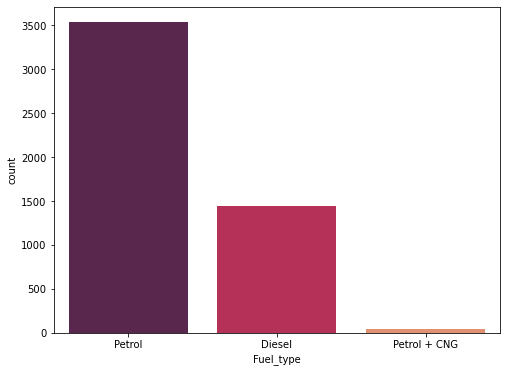

In [146]:
print(data['Fuel_type'].value_counts())
print("/n")
plt.figure(figsize=[8,6])
sns.countplot(data['Fuel_type'],palette='rocket')
plt.show()

1st Owner    3978
2nd Owner     948
3rd Owner      86
4th Owner       5
Name: Owner, dtype: int64
/n


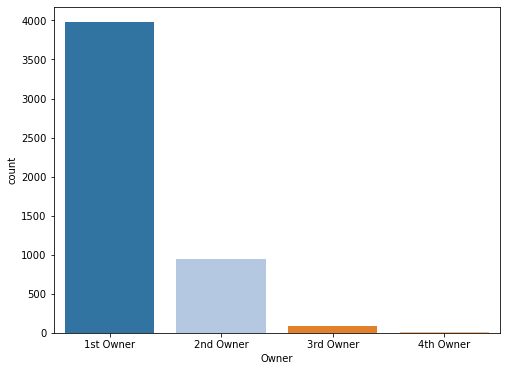

In [147]:
print(data['Owner'].value_counts())
print("/n")
plt.figure(figsize=[8,6])
sns.countplot(data['Owner'],palette='tab20')
plt.show()

MANUAL       4268
AUTOMATIC     749
Name: Transmission, dtype: int64
/n


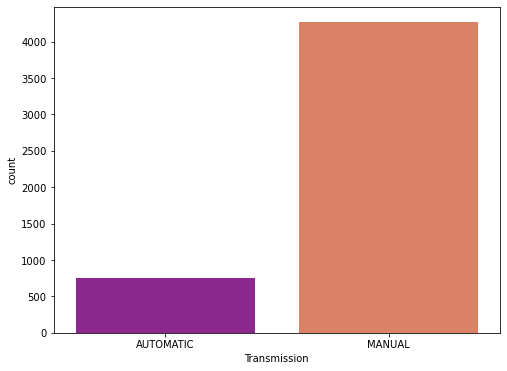

In [148]:
print(data['Transmission'].value_counts())
print("/n")
plt.figure(figsize=[8,6])
sns.countplot(data['Transmission'],palette='plasma')
plt.show()

2017    835
2018    818
2019    731
2016    582
2020    490
2015    449
2014    420
2021    255
2013    238
2012     68
2011     60
2010     30
2009     25
2022     13
2008      3
Name: year of purches, dtype: int64
/n


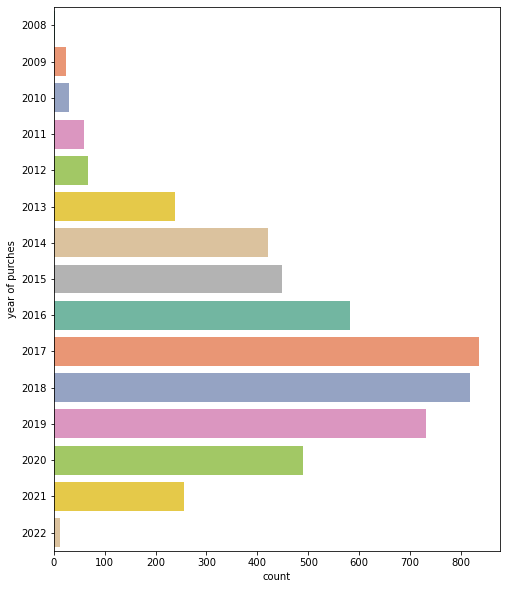

In [149]:
print(data['year of purches'].value_counts())
print("/n")
plt.figure(figsize=[8,10])
sns.countplot(y=data['year of purches'],palette='Set2')
plt.show()

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

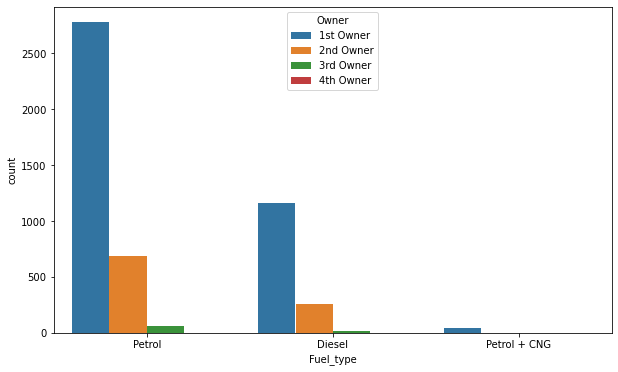

In [150]:
plt.figure(figsize=[10,6])
sns.countplot(data["Fuel_type"], hue=data["Owner"])

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

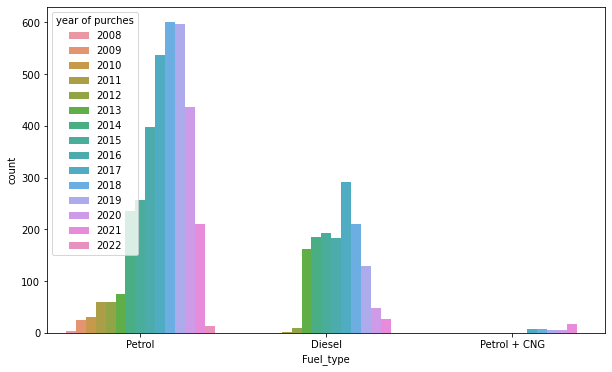

In [151]:
plt.figure(figsize=[10,6])
sns.countplot(data["Fuel_type"], hue=data["year of purches"])

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

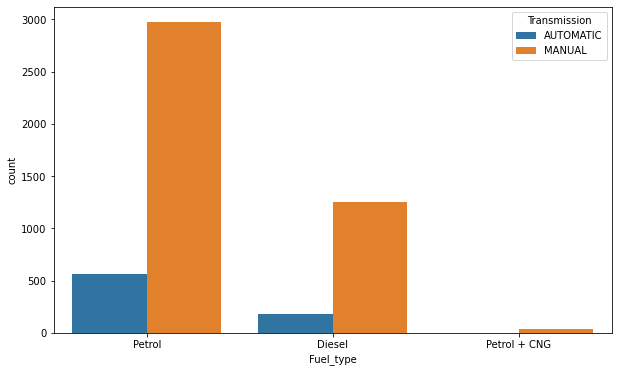

In [152]:
plt.figure(figsize=[10,6])
sns.countplot(data["Fuel_type"], hue=data["Transmission"])

### Observation-3

From the above graphs we can conclude that:

* In our collected dataset, The number of petrol cars are higher(3535), Diesel cars are also being used in a good amount of number(1439), CNG based cars are fewer in number(43).


* Most of the used cars are being sold by the 1st owner, So the chances of price will be increased. Less cars are avilable in the section of 2nd owner and 3rd owner.The count of 4th owner cars are negligible.


* When we see the used car's tranmission, The number of automatic transmission cars is very high and automatic transmission cars  are less.


* It is important to know the year of purches, when you go for buying a used car, here we can see that most of the cars are purchesed in the 2013 to 2017.Some cars are avilable in our dataset which had been bought in 2008 to 2012.


### Checking Outliers

In [153]:
data.describe()

,year of purches,Kilometers_Driven,Price
count,5017.000000,5017.000000,5.017000e+03
mean,2017.001196,44586.900339,6.459337e+05
std,2.433157,31501.419306,3.455050e+05
min,2008.000000,1.000000,1.465990e+05
25%,2015.000000,21907.000000,4.197990e+05
50%,2017.000000,39364.000000,5.480990e+05
75%,2019.000000,61862.000000,7.536990e+05
max,2022.000000,400055.000000,3.287199e+06


year of purches         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Kilometers_Driven    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Price                AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

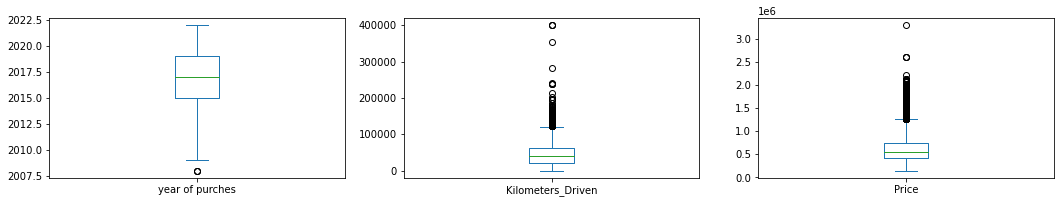

In [154]:
data.plot(kind='box',subplots=True,figsize=[18,10],layout=(3,3))

In [155]:
from scipy.stats import skew

In [156]:
data.skew()

year of purches     -0.550334
Kilometers_Driven    2.214225
Price                1.813675
dtype: float64

In [157]:
ske=['year of purches','Kilometers_Driven','Price']

year of purches
-0.550169478815106


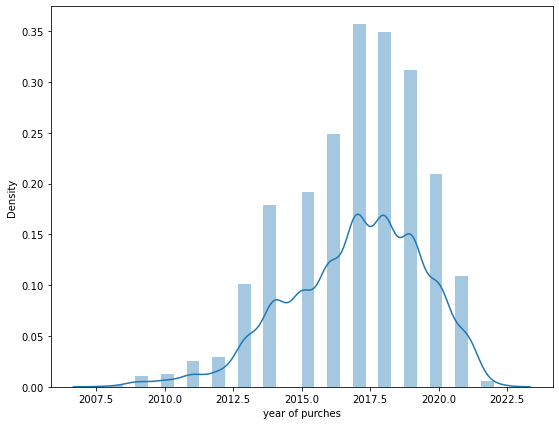

Kilometers_Driven
2.2135633317839476


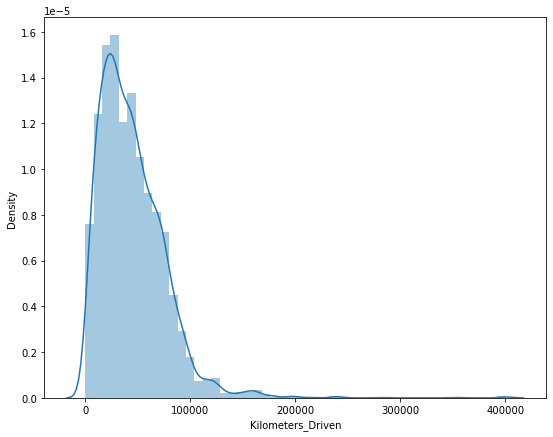

Price
1.813132923957288


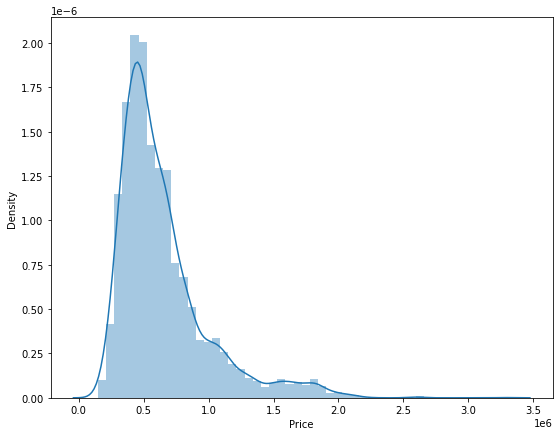

In [158]:
for i in ske:
    print(i)
    print(skew(data[i]))
    
    plt.figure(figsize=[9,7])
    sns.distplot(data[i])
    plt.show()

### Observation-4

* In our dataset only 3 columns are showing some outliers that is price, year of purches and kilometers driven. Because the mean is 44586 and standard daviation is 31501 and maximum max values is 400055 which is very higher and reason of outliers.

* High Skewness is present in the kilometers driven column(2.21), shown that data data are not equally distributed.

### Checking Relations

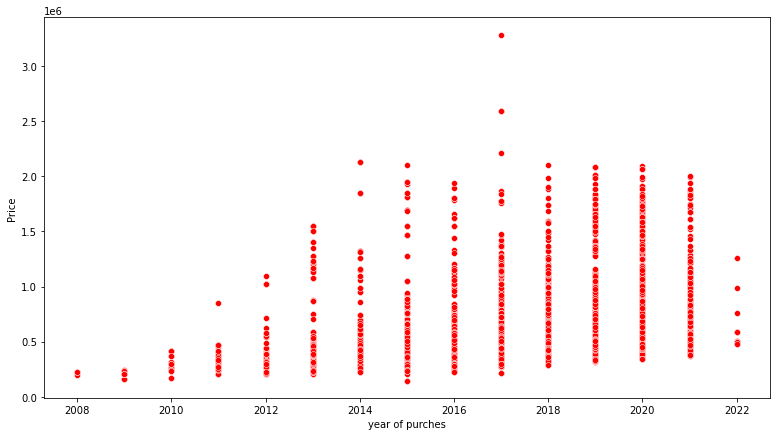

In [159]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,y='Price',x='year of purches',color='r')
plt.show()

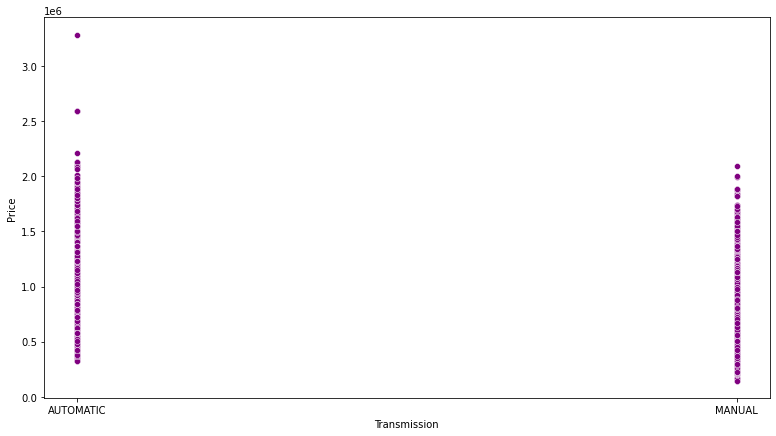

In [160]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,y='Price',x='Transmission',color='purple')
plt.show()

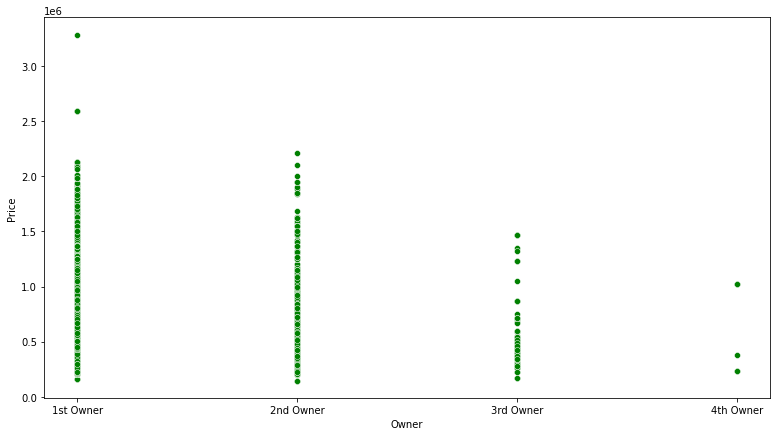

In [161]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,y='Price',x='Owner',color='g')
plt.show()

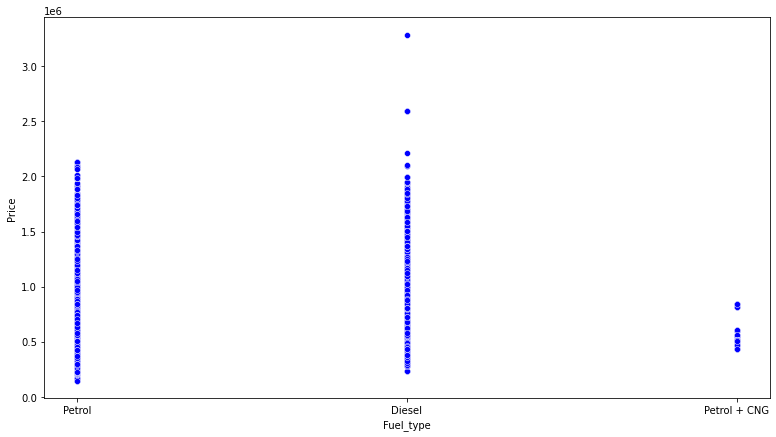

In [162]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,y='Price',x='Fuel_type',color='b')
plt.show()

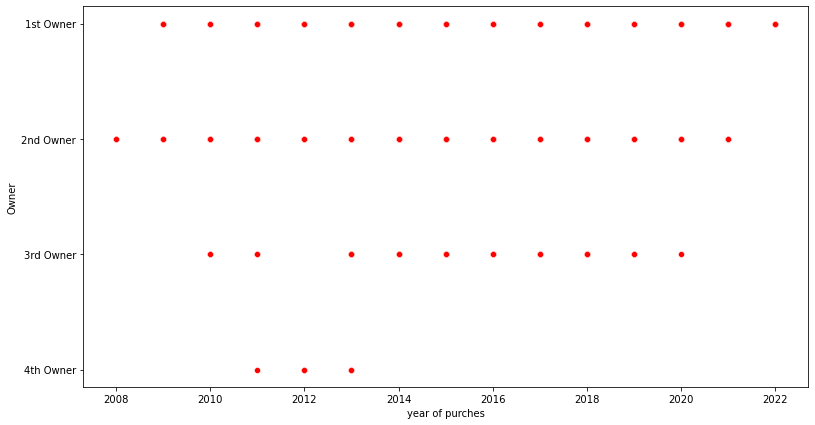

In [163]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,x='year of purches',y='Owner',color='r')
plt.show()

### Encoding the data

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
le=LabelEncoder()

In [166]:
enc=['car name','Owner','Fuel_type','Transmission','company']

In [167]:
for i in enc:
    data[i]=le.fit_transform(data[i])

In [168]:
data.head()

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,Price,company
0,198,2014,36806,0,1,0,2133299,12
1,193,2009,57473,0,1,1,156599,11
2,104,2020,7568,0,1,0,1741799,8
3,31,2019,15973,0,1,1,572399,4
5,49,2017,17117,0,1,1,779899,4


### Checking Correlation

In [169]:
data.corr()['Price']

car name            -0.112760
year of purches      0.357737
Kilometers_Driven   -0.099637
Owner               -0.066603
Fuel_type           -0.269089
Transmission        -0.447382
Price                1.000000
company             -0.110577
Name: Price, dtype: float64

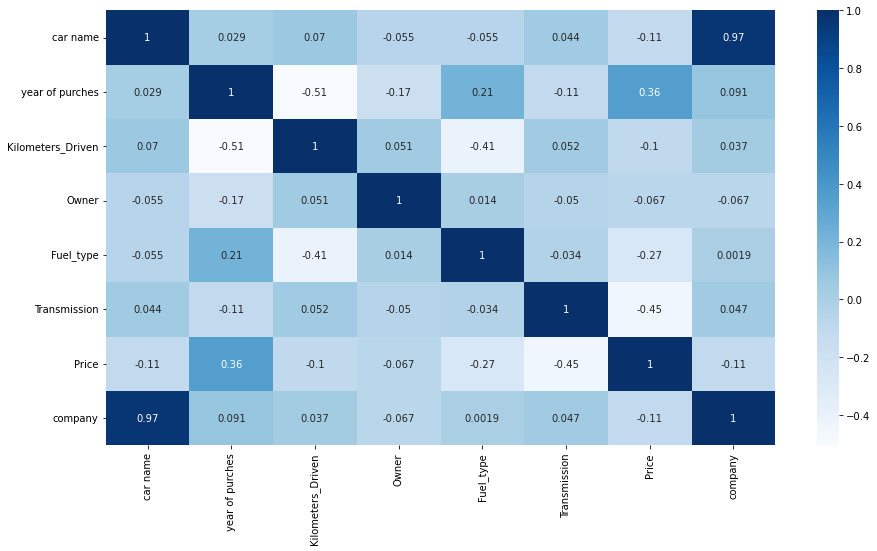

In [170]:
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

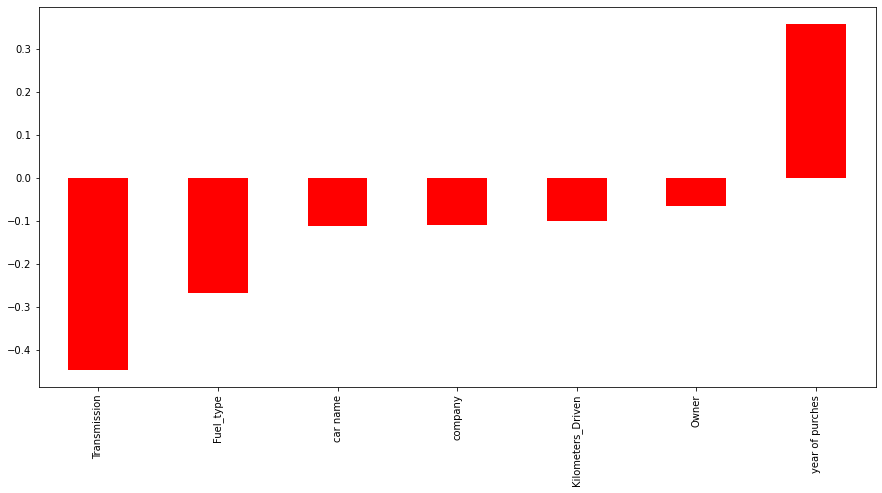

In [171]:
plt.figure(figsize=[15,7])
data.corr()['Price'].sort_values().drop(['Price']).plot(kind='bar',color='r')
plt.show()

### Observation-5

Above results shows that:

* year of purches column making positive correlation with the target column.

* transmission, fule_type, car name, company, owner and kilometers driven column are making negative correlation with the target column.

* car name and company columns making a strong correlation with each other, means one will increase another will also increase.

* Those car prices are high which have been purchesed from the year 2014 to 2021.

* The prices are high when someone is going to buy automatic transmission car.

* The car prices are high when the car owner stats is 1st owner and 2nd owner as compare to others.


## Data preprocessing

In [172]:
y=data['Price']

In [173]:
data.drop(['Price'],axis=1,inplace=True)

In [174]:
x=data

In [175]:
x.shape

(5017, 7)

In [176]:
y.shape

(5017,)

### Removing Outliers

In [177]:
ske=['year of purches','Kilometers_Driven']

In [178]:
from scipy.stats import zscore

In [179]:
z=np.abs(zscore(x[ske]))

In [180]:
z.shape

(5017, 2)

In [181]:
threshold=3
print(np.where(z>3))

(array([   1,    5,    8,   58,  212,  237,  239,  291,  328,  405,  486,
        534,  605,  633,  828,  960, 1058, 1172, 1177, 1181, 1185, 1192,
       1298, 1310, 1435, 1597, 1613, 1767, 1972, 1974, 2053, 2057, 2269,
       2472, 2517, 2540, 2555, 2564, 2722, 2847, 2924, 2929, 2930, 3005,
       3075, 3117, 3152, 3174, 3183, 3241, 3384, 3443, 3488, 3531, 3562,
       3567, 3568, 3643, 3746, 3833, 3838, 3861, 3879, 3939, 4027, 4087,
       4131, 4169, 4175, 4217, 4223, 4231, 4240, 4302, 4313, 4372, 4395,
       4480, 4528, 4538, 4546, 4605, 4732, 4777, 4800, 4815, 4824, 4982],
      dtype=int64), array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64))


In [182]:
x=x[(z<3).all(axis=1)]

In [183]:
y=y[(z<3).all(axis=1)]

In [184]:
x.shape

(4929, 7)

In [185]:
y.shape

(4929,)

In [186]:
data_loss=((5017-4929)/5017)*100

In [187]:
print("data loss is",data_loss)

data loss is 1.754036276659358


### Skewness removing

In [188]:
col=x.columns

In [189]:
x['Kilometers_Driven']=np.sqrt(x['Kilometers_Driven'])

In [190]:
x['year of purches']=np.sqrt(x['year of purches'])

<AxesSubplot:xlabel='year of purches', ylabel='Density'>

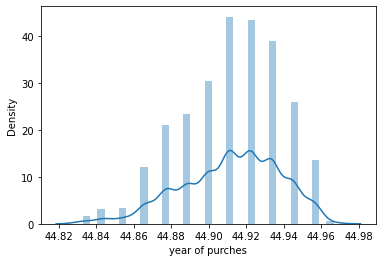

In [191]:
sns.distplot(x['year of purches'])

In [193]:
x.head()

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,company
0,198,44.877611,191.848899,0,1,0,12
2,104,44.944410,86.994253,0,1,0,8
3,31,44.933284,126.384334,0,1,1,4
5,49,44.911023,130.831953,0,1,1,4
7,97,44.866469,168.193341,1,0,0,6


### Scaling tha data

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
st=StandardScaler()

In [196]:
x=st.fit_transform(x)

In [197]:
x=pd.DataFrame(x,columns=col)

In [198]:
x

,car name,year of purches,Kilometers_Driven,Owner,Fuel_type,Transmission,company
0,0.985187,-1.307065,-0.058532,-0.488409,0.586076,-2.375470,0.782612
1,-0.365786,1.240880,-1.620250,-0.488409,0.586076,-2.375470,-0.222402
2,-1.414947,0.816485,-1.033569,-0.488409,0.586076,0.420969,-1.227416
3,-1.156250,-0.032619,-0.967326,-0.488409,0.586076,0.420969,-1.227416
4,-0.466391,-1.732092,-0.410861,1.662949,-1.568113,-2.375470,-0.724909
...,...,...,...,...,...,...,...
4924,-0.969413,-1.307065,1.265266,-0.488409,0.586076,0.420969,-0.976163
4925,-0.969413,0.391986,-0.358194,1.662949,0.586076,0.420969,-0.976163
4926,-0.955041,-0.032619,0.350074,-0.488409,0.586076,0.420969,-0.976163
4927,-0.911925,-1.307065,1.696731,3.814307,0.586076,-2.375470,-0.976163


# Model learning phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use Regression model because our target column is numeric in nature.

For Regression model, Some matrix we are going to find like:

1. R2 score.
2. Mean absolute error.
3. Mean squared error.
4. Root mean squared error.


#### Models

1. Decision Tree Regressor
2. KNeighbors Regressor
3. Decision Tree regressor
4. RandomForestRegressor 
5. AdaBoostRegressor
6. GradientBoostingRegressor
7. XGboost regressor

In [199]:
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [200]:
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score > max_score:
            max_score=r2score
            max_state=i
    print('max score is {} at random state {}'.format(max_score,max_state)) 

## Linear Regression
Finding best random state by calling model_select function

In [201]:
model_select(LinearRegression)

max score is 0.47614781536471773 at random state 8


In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=8)

In [203]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print('Mean_squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(pred,y_test)))

Mean_squared error: 61097998365.33467
Mean absolute error: 186134.02436226993
r2_score: -0.1594610419611764
Root mean squared error: 247180.09297946037


In [204]:
for i in range(9,16):
    cvs=cross_val_score(LR,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.38021102793820916
cross validation score when cv is 10 = 0.38964611289842066
cross validation score when cv is 11 = 0.37708300046640164
cross validation score when cv is 12 = 0.3744014522013146
cross validation score when cv is 13 = 0.3613338473993593
cross validation score when cv is 14 = 0.33208062981626046
cross validation score when cv is 15 = 0.3518439621910035


## Decision tree regressor

Finding best random state by calling model_select function

In [205]:
model_select(DecisionTreeRegressor)

max score is 0.9318122090274361 at random state 40


In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)

In [207]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.9240270691094222
Mean absoluate error : 39102.69216589862
Means squred error: 9884841369.949308
Root mean squred error:  99422.5395468719


In [208]:
for i in range(9,16):
    cvs=cross_val_score(Dt,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.8737534355480465
cross validation score when cv is 10 = 0.8774894943520433
cross validation score when cv is 11 = 0.8790108911836382
cross validation score when cv is 12 = 0.878210852490395
cross validation score when cv is 13 = 0.8880938339355364
cross validation score when cv is 14 = 0.8802303124229143
cross validation score when cv is 15 = 0.886715155854144


In [209]:
r2dt=92.40
cvdt=88.80
ddt=r2dt-cvdt

## KNeighbor regressor

Finding best random state by calling model_select function

In [210]:
model_select(KNeighborsRegressor)

max score is 0.7746623508395747 at random state 4


In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=4)

In [212]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.7746623508395747
Mean absolute error: 108523.79834101383
Mean squred error : 25996739622.171795
Root mean squred error: 161235.04464654016


In [213]:
for i in range(9,16):
    cvs=cross_val_score(knn,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.6939160931405133
cross validation score when cv is 10 = 0.7053130206353337
cross validation score when cv is 11 = 0.6963700949872088
cross validation score when cv is 12 = 0.687198259015671
cross validation score when cv is 13 = 0.6929133786261492
cross validation score when cv is 14 = 0.6695171571954432
cross validation score when cv is 15 = 0.6911772994148347


In [214]:
r2knn=77.46
cvknn=70.53
dknn=r2knn-cvknn

## Lasso Regressor

In [215]:
model_select(Lasso)

max score is 0.4761475245809321 at random state 8


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=8)

In [218]:
lss=Lasso()
lss.fit(x_train,y_train)
pred=lss.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.4761475245809321
Mean absolute error: 186133.75797305064
Mean squred error : 61098032280.06821
Root mean squred error: 247180.16158273746


In [219]:
for i in range(9,16):
    cvs=cross_val_score(lss,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.38021111635703975
cross validation score when cv is 10 = 0.3896461500238937
cross validation score when cv is 11 = 0.3770830325569065
cross validation score when cv is 12 = 0.3744015914243806
cross validation score when cv is 13 = 0.3613341051245819
cross validation score when cv is 14 = 0.3320809298942883
cross validation score when cv is 15 = 0.3518442000536705


In [220]:
r2lss=47.61
cvlss=38.96
dlss=47.61-38.96

## Ridge Regressor

In [221]:
model_select(Ridge)

max score is 0.4761421697439796 at random state 8


In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=8)

In [223]:
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.4761421697439796
Mean absolute error: 186124.41299492292
Mean squred error : 61098656826.13095
Root mean squred error: 247181.4249213135


In [224]:
for i in range(9,16):
    cvs=cross_val_score(ri,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.38022341152678973
cross validation score when cv is 10 = 0.38965574414198856
cross validation score when cv is 11 = 0.37709463228244466
cross validation score when cv is 12 = 0.3744098760315173
cross validation score when cv is 13 = 0.361348031625079
cross validation score when cv is 14 = 0.3320952648445492
cross validation score when cv is 15 = 0.3518590500538946


In [225]:
r2ri=47.61
cvri=38.96
dri=47.61-38.96

## Random forest classifier
Finding best random state by calling model_select function

In [226]:
model_select(RandomForestRegressor)

max score is 0.9499188456474392 at random state 4


In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=4)

In [228]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9518885457124674
Mean absolute error 39346.301963133636
Mean squared error: 5550519208.028845
Root mean squared error: 74501.80674338606


In [229]:
for i in range(9,16):
    cvs=cross_val_score(rfr,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.9128902596960202
cross validation score when cv is 10 = 0.9145716490225946
cross validation score when cv is 11 = 0.9176763355672928
cross validation score when cv is 12 = 0.9185819855644238
cross validation score when cv is 13 = 0.9173015920666102
cross validation score when cv is 14 = 0.9189365036579983
cross validation score when cv is 15 = 0.9208354214215075


In [247]:
r2rfr=95.18
cvrfr=92.08
drfr=r2rfr-cvrfr

## AdaBoostRegressor
Finding best random state by calling model_select function

In [231]:
model_select(AdaBoostRegressor)

max score is 0.5423343888743941 at random state 40


In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [233]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.4622011704761785
Mean absolute error: 220360.6355038466
Mean squared error: 70221103821.96092
Root mean squared error: 264992.6486187134


In [234]:
for i in range(9,16):
    cvs=cross_val_score(ada,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.3014646443843787
cross validation score when cv is 10 = 0.302750477844152
cross validation score when cv is 11 = 0.24307785784428193
cross validation score when cv is 12 = 0.2433367872581751
cross validation score when cv is 13 = 0.22894441640405344
cross validation score when cv is 14 = 0.13614655034812312
cross validation score when cv is 15 = 0.20020940389422137


In [249]:
r2ada=46.22
cvada=30.27
dada=r2ada-cvada

## GradientBoostingRegressor
Finding best random state by calling model_select function

In [235]:
model_select(GradientBoostingRegressor)

max score is 0.8620729666427605 at random state 4


In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)

In [238]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8649191622997077
Mean absolute error: 88206.18895553515
Mean squared error: 15783180176.931759
Root mean squared error: 125631.12742044369


In [239]:
for i in range(9,16):
    cvs=cross_val_score(gbr,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.8119233492839667
cross validation score when cv is 10 = 0.8174850150755348
cross validation score when cv is 11 = 0.8134095106786415
cross validation score when cv is 12 = 0.8127054209685873
cross validation score when cv is 13 = 0.81123831477024
cross validation score when cv is 14 = 0.7923510287990877
cross validation score when cv is 15 = 0.803158279707409


In [240]:
r2gbr=86.49
cvgbr=81.19
dgbr=r2gbr-cvgbr

## Xg Boost regressor

In [241]:
model_select(xg.XGBRegressor)

max score is 0.9601971740286308 at random state 40


In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=49)

In [243]:
XG=xg.XGBRegressor()
XG.fit(x_train,y_train)
pred=XG.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9560834702248259
Mean absolute error: 42211.923415898615
Mean squared error: 5581440859.501381
Root mean squared error: 74709.0413504375


In [245]:
for i in range(9,16):
    cvs=cross_val_score(XG,x,y,cv=i)
    print("cross validation score when cv is",i,'=',cvs.mean())

cross validation score when cv is 9 = 0.9340325327546434
cross validation score when cv is 10 = 0.9347756270713969
cross validation score when cv is 11 = 0.93495383568659
cross validation score when cv is 12 = 0.9380816737548193
cross validation score when cv is 13 = 0.9380585866314224
cross validation score when cv is 14 = 0.9394404393418794
cross validation score when cv is 15 = 0.9397877482419211


In [246]:
r2xg=95.60
cvxg=93.97
dxg=r2xg-cvxg

## Comparison of all the models

In [253]:
jj=({'R2 score':[r2dt,r2knn,r2lss,r2ri,r2rfr,r2gbr,r2xg,r2ada],
    'Cross val score':[cvdt,cvknn,cvlss,cvri,cvrfr,cvgbr,cvxg,cvada],
    'Diffrence':[ddt,dknn,dlss,dri,drfr,dgbr,dxg,dada]})

In [254]:
result=pd.DataFrame(jj,index=['Decision tree','kneighbour','Lasso','Ridge',
                              'Random forest','GredientBoosting','XGBoost','Adaboost'])

In [255]:
result

,R2 score,Cross val score,Diffrence
Decision tree,92.40,88.80,3.60
kneighbour,77.46,70.53,6.93
Lasso,47.61,38.96,8.65
Ridge,47.61,38.96,8.65
Random forest,95.18,92.08,3.10
GredientBoosting,86.49,81.19,5.30
XGBoost,95.60,93.97,1.63
Adaboost,46.22,30.27,15.95


In [256]:
aa=list(result['Cross val score'])

In [257]:
bb=list(result.index)

In [258]:
kk=pd.DataFrame({'Model':bb,'Score':aa},index=[1,2,3,4,5,6,7,8])

In [259]:
kk

,Model,Score
1,Decision tree,88.80
2,kneighbour,70.53
3,Lasso,38.96
4,Ridge,38.96
5,Random forest,92.08
6,GredientBoosting,81.19
7,XGBoost,93.97
8,Adaboost,30.27


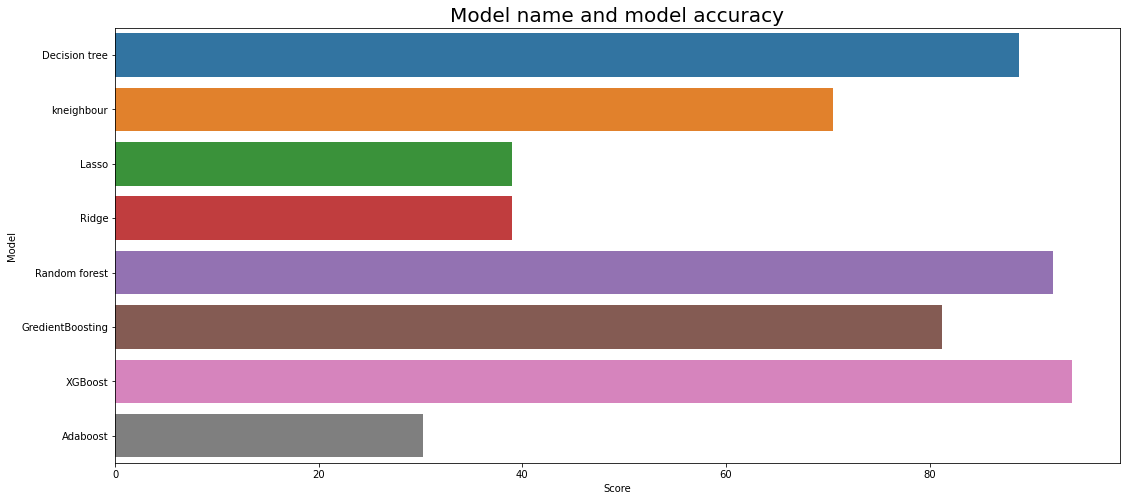

In [260]:
plt.figure(figsize=[18,8])
sns.barplot(data=kk,y='Model',x='Score')
plt.title("Model name and model accuracy",fontsize=20)
plt.show()

## Best Model
### We are chosing XG boost regressor as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing XGR
### Model accuracy is : 95.60
### Cross_validation score : 93.97	
### Diffrence : 1.63

In [266]:
parameter={'n_estimators':[25,50,75,125],
           'max_depth':[5,7,9,11],
           'learning_rate':[0.01,0.001,0.1,1]}

In [267]:
new_XG=GridSearchCV(XG,parameter,cv=19)
new_XG.fit(x_train,y_train)
new_XG.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 125}

In [271]:
new_XG.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=125, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [274]:
new_XG_pred=new_XG.best_estimator_.predict(x_test)
r2_score(y_test,new_XG_pred)

0.9483553673965043

In [275]:
new_xg=xg.XGBRegressor()
new_xg.fit(x_train,y_train)
pred=new_xg.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9560834702248259
Mean absolute error: 42211.923415898615
Mean squared error: 5581440859.501381
Root mean squared error: 74709.0413504375


## Model- XG Boost Regressor
## R2 Score- 95.60 %

In [276]:
pred=new_xg.predict(x_test)

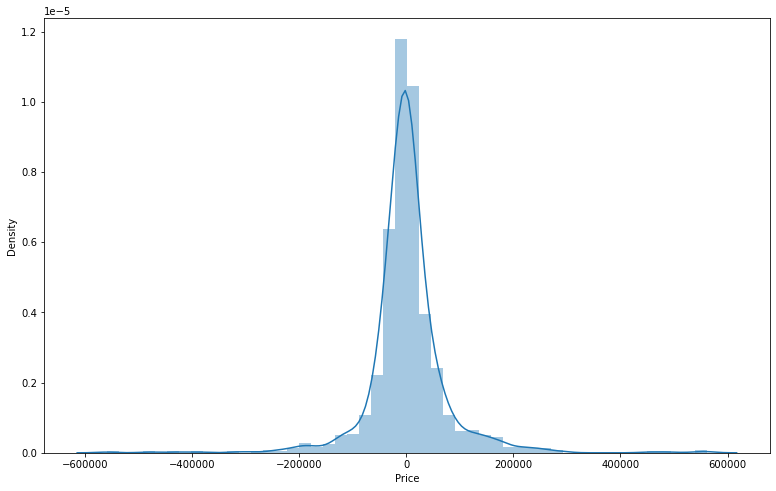

In [277]:
plt.figure(figsize=[13,8])
sns.distplot(y_test-pred)
plt.show()

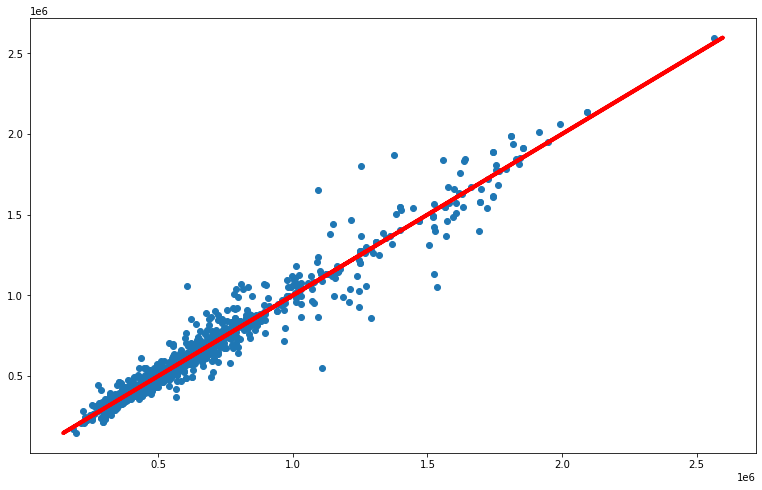

In [278]:
plt.figure(figsize=[13,8])
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=4,color='r')
plt.show()

In [279]:
final=pd.DataFrame([pred[:],y_test[:]],index=['Predict','Original'])

In [280]:
final

,0,1,2,3,4,5,6,7,8,9,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084
Predict,1297817.75,675218.8125,1246972.625,409726.40625,766090.5625,1662641.375,456501.96875,435981.78125,293634.6875,382070.875,...,850616.25,394353.90625,1138390.5,719124.5625,475792.59375,507071.0,471814.21875,289434.75,359939.34375,558268.0625
Original,1261699.00,691099.0000,1217299.000,396199.00000,791299.0000,1673799.000,433820.00000,457399.00000,280699.0000,419199.000,...,873799.00,412199.00000,1381399.0,704999.0000,489351.00000,481499.0,477499.00000,338099.00,453799.00000,562699.0000


In [281]:
import joblib

In [283]:
joblib.dump(new_xg,"Car_price.pkl")

['Car_price.pkl']